In [28]:
#import necessary libraries
import pandas as pd  #for data handlimg
import numpy as np  #for numcrical operaions
import matplotlib.pyplot as plt #for plotting graphs
from sklearn.model_selection import train_test_split #for splitting data
from sklearn.linear_model import LinearRegression # for Linear Regression model


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np # Ensure numpy is imported for this cell
import pandas as pd # Ensure pandas is imported for this cell
#-------------------------------------------------------
#Step->> 1: Create a Dataset
#-------------------------------------------------------
fil_path='/content/drive/MyDrive/Datasets/StudentsPerformance.csv'
df=pd.read_csv(fil_path)

# Create a DataFrame
df


df.head() # Print first few rows of the synthetic dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
conuts= df['gender'].value_counts().reset_index()
conuts.columns = ['Gender ', 'Count']
conuts


,Gender,Count
0,female,518
1,male,482


In [37]:
conuts= df['race/ethnicity'].value_counts().reset_index()
conuts.columns = ['Race/Ethnicity ', 'Count']
conuts

,Race/Ethnicity,Count
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


In [40]:
counts = df['parental level of education'].value_counts().reset_index()
counts.columns = ['Eduction', 'Count']
counts

,Eduction,Count
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [47]:
counts = df['writing score'].value_counts().reset_index()
counts.columns = ['Writing Score', 'Count']
counts

,Writing Score,Count
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,19,1
73,35,1
74,15,1
75,30,1


In [48]:
counts = df['test preparation course'].value_counts().reset_index()
counts.columns = ['Test Preparation Course', 'Count']
counts

,Test Preparation Course,Count
0,none,642
1,completed,358


In [49]:
counts = df['reading score'].value_counts().reset_index()
counts.columns = ['Reading score', 'Count']
counts

,Reading score,Count
0,72,34
1,74,33
2,64,32
3,73,30
4,67,30
...,...,...
67,32,1
68,26,1
69,28,1
70,23,1


In [50]:
counts = df['math score'].value_counts().reset_index()
counts.columns = ['Math score', 'Count']
counts

,Math score,Count
0,65,36
1,62,35
2,69,32
3,59,32
4,73,27
...,...,...
76,24,1
77,26,1
78,19,1
79,23,1


In [52]:
counts = df['lunch'].value_counts().reset_index()
counts.columns = ['Lunch', 'Count']
counts

,Lunch,Count
0,standard,645
1,free/reduced,355


In [32]:
#-------------------------------------------------------
#Step->> 3: Train-Test Split
#-------------------------------------------------------

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression # Import LinearRegression here
#-------------------------------------------------------
#Step->> 4: Train the Linear Rehression Model
#-------------------------------------------------------
model =LinearRegression() #Create model object
model.fit(X_train, Y_train) #Train the model

LinearRegression()

In [57]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [58]:
df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)

In [60]:
df.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [34]:
#-------------------------------------------------------
#Step->> 5: Predict on test data
#-------------------------------------------------------
y_pred = model.predict(X_test)

In [63]:
#-------------------------------------------------------
# Step ->> 6: Predict for a new Student
#-------------------------------------------------------

# Assume a new student studied 'new_student_hours' hours
# Using the value from kernel state variable `hours_studied` for demonstration
new_student_hours = 7.5

# The model expects a 2D array for prediction, even for a single sample.
# Create a DataFrame with the correct column name to match the training data (X).
input_for_prediction = pd.DataFrame({'Hours Studied': [new_student_hours]})

predicted_score = model.predict(input_for_prediction)
predicted_score = float(predicted_score[0])  # Extract the scalar predicted score

print(f"\nPredicted score for studying {new_student_hours} hours: {predicted_score:.2f}")


Predicted score for studying 7.5 hours: 65.38


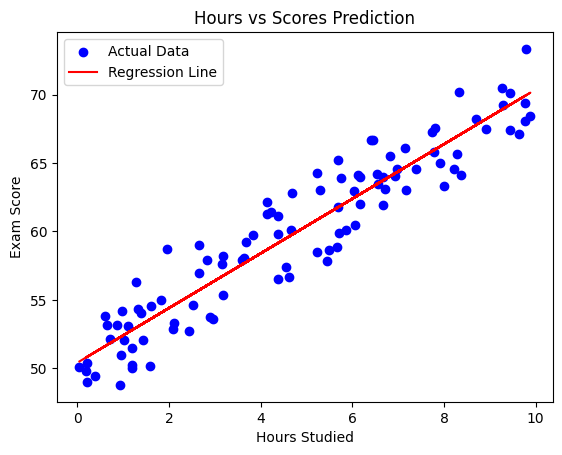

In [64]:
#-------------------------------------------------------
# Step ->> 7: Visualization
#-------------------------------------------------------

plt.scatter(X, Y, color="blue", label="Actual Data")   # Plot actual data points
plt.plot(X, model.predict(X), color="red", label="Regression Line")  # Regression line
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours vs Scores Prediction")
plt.legend()
plt.show()

In [ ]:
#-------------------------------------------------------
# Step ->> 7: Model Save
#-------------------------------------------------------
import pickle
# Load the model from the file
knn_from_joblib =('filename')

# Use the loaded model to make predictions
knn_from_joblib.predict(X_test)